In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
house_data = pd.read_excel(r'C:\Users\Yogen\Documents\1. MBA\Outlook Internship\incinerator_changed.xlsx')

In [6]:
house_data.head()

,year,age,neighbourhood,dist_bus,dist_interstate,rooms,area,land,baths,dist_incinerator,wind,year_1981,near_incinerator,y81_and_nearinc,price
0,1978,48,4,3000,1000,7,1660,4578,1,10700,3,0,1,0,60000
1,1978,83,4,4000,1000,6,2612,8370,2,11000,3,0,1,0,40000
2,1978,58,4,4000,1000,6,1144,5000,1,11500,3,0,1,0,34000
3,1978,11,4,4000,1000,5,1136,10000,1,11900,3,0,1,0,63900
4,1978,48,4,4000,2000,5,1868,10000,1,12100,3,0,1,0,44000


In [7]:
#changing year by get dummies
house_data = pd.concat([ pd.get_dummies(house_data["year"]), house_data.drop(["year"], axis=1)], axis=1)

In [8]:
house_data.head()

,1978,1981,age,neighbourhood,dist_bus,dist_interstate,rooms,area,land,baths,dist_incinerator,wind,year_1981,near_incinerator,y81_and_nearinc,price
0,1,0,48,4,3000,1000,7,1660,4578,1,10700,3,0,1,0,60000
1,1,0,83,4,4000,1000,6,2612,8370,2,11000,3,0,1,0,40000
2,1,0,58,4,4000,1000,6,1144,5000,1,11500,3,0,1,0,34000
3,1,0,11,4,4000,1000,5,1136,10000,1,11900,3,0,1,0,63900
4,1,0,48,4,4000,2000,5,1868,10000,1,12100,3,0,1,0,44000


In [9]:
#converting neighbourhood data to dummies
house_data = pd.concat([pd.get_dummies(house_data['neighbourhood'], prefix="nhood"), house_data.drop(["neighbourhood"], axis=1)], axis=1)

In [10]:
house_data.head()

,nhood_0,nhood_1,nhood_2,nhood_3,nhood_4,nhood_5,nhood_6,1978,1981,age,...,rooms,area,land,baths,dist_incinerator,wind,year_1981,near_incinerator,y81_and_nearinc,price
0,0,0,0,0,1,0,0,1,0,48,...,7,1660,4578,1,10700,3,0,1,0,60000
1,0,0,0,0,1,0,0,1,0,83,...,6,2612,8370,2,11000,3,0,1,0,40000
2,0,0,0,0,1,0,0,1,0,58,...,6,1144,5000,1,11500,3,0,1,0,34000
3,0,0,0,0,1,0,0,1,0,11,...,5,1136,10000,1,11900,3,0,1,0,63900
4,0,0,0,0,1,0,0,1,0,48,...,5,1868,10000,1,12100,3,0,1,0,44000


In [11]:
house_data.columns

Index([         'nhood_0',          'nhood_1',          'nhood_2',
                'nhood_3',          'nhood_4',          'nhood_5',
                'nhood_6',               1978,               1981,
                    'age',         'dist_bus',  'dist_interstate',
                  'rooms',             'area',             'land',
                  'baths', 'dist_incinerator',             'wind',
              'year_1981', 'near_incinerator',  'y81_and_nearinc',
                  'price'],
      dtype='object')

In [12]:
house_data = pd.concat([pd.get_dummies(house_data['rooms'], prefix='rooms'), house_data.drop(["rooms"], axis=1)], axis=1)


In [13]:
house_data.columns

Index([         'rooms_4',          'rooms_5',          'rooms_6',
                'rooms_7',          'rooms_8',          'rooms_9',
               'rooms_10',          'nhood_0',          'nhood_1',
                'nhood_2',          'nhood_3',          'nhood_4',
                'nhood_5',          'nhood_6',               1978,
                     1981,              'age',         'dist_bus',
        'dist_interstate',             'area',             'land',
                  'baths', 'dist_incinerator',             'wind',
              'year_1981', 'near_incinerator',  'y81_and_nearinc',
                  'price'],
      dtype='object')

In [14]:
house_data.groupby(['baths']).count() #leaving baths as is as they're not categorical

,rooms_4,rooms_5,rooms_6,rooms_7,rooms_8,rooms_9,rooms_10,nhood_0,nhood_1,nhood_2,...,dist_bus,dist_interstate,area,land,dist_incinerator,wind,year_1981,near_incinerator,y81_and_nearinc,price
baths,,,,,,,,,,,,,,,,,,,,,
1,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55
2,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
3,156,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156
4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [15]:
len(house_data['dist_incinerator'].unique()) #will be left alone as it is continous data

176

In [16]:
house_data.columns

Index([         'rooms_4',          'rooms_5',          'rooms_6',
                'rooms_7',          'rooms_8',          'rooms_9',
               'rooms_10',          'nhood_0',          'nhood_1',
                'nhood_2',          'nhood_3',          'nhood_4',
                'nhood_5',          'nhood_6',               1978,
                     1981,              'age',         'dist_bus',
        'dist_interstate',             'area',             'land',
                  'baths', 'dist_incinerator',             'wind',
              'year_1981', 'near_incinerator',  'y81_and_nearinc',
                  'price'],
      dtype='object')

In [17]:
house_data = pd.concat([pd.get_dummies(house_data['wind'], prefix="wind"), house_data.drop(["wind"], axis=1)], axis=1)


In [18]:
house_data.columns

Index([          'wind_3',           'wind_4',           'wind_5',
                 'wind_7',          'wind_11',          'rooms_4',
                'rooms_5',          'rooms_6',          'rooms_7',
                'rooms_8',          'rooms_9',         'rooms_10',
                'nhood_0',          'nhood_1',          'nhood_2',
                'nhood_3',          'nhood_4',          'nhood_5',
                'nhood_6',               1978,               1981,
                    'age',         'dist_bus',  'dist_interstate',
                   'area',             'land',            'baths',
       'dist_incinerator',        'year_1981', 'near_incinerator',
        'y81_and_nearinc',            'price'],
      dtype='object')

In [19]:
house_data.groupby(['y81_and_nearinc']).count()

,wind_3,wind_4,wind_5,wind_7,wind_11,rooms_4,rooms_5,rooms_6,rooms_7,rooms_8,...,age,dist_bus,dist_interstate,area,land,baths,dist_incinerator,year_1981,near_incinerator,price
y81_and_nearinc,,,,,,,,,,,,,,,,,,,,,
0,281,281,281,281,281,281,281,281,281,281,...,281,281,281,281,281,281,281,281,281,281
1,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40


In [20]:
house_data.head()

,wind_3,wind_4,wind_5,wind_7,wind_11,rooms_4,rooms_5,rooms_6,rooms_7,rooms_8,...,dist_bus,dist_interstate,area,land,baths,dist_incinerator,year_1981,near_incinerator,y81_and_nearinc,price
0,1,0,0,0,0,0,0,0,1,0,...,3000,1000,1660,4578,1,10700,0,1,0,60000
1,1,0,0,0,0,0,0,1,0,0,...,4000,1000,2612,8370,2,11000,0,1,0,40000
2,1,0,0,0,0,0,0,1,0,0,...,4000,1000,1144,5000,1,11500,0,1,0,34000
3,1,0,0,0,0,0,1,0,0,0,...,4000,1000,1136,10000,1,11900,0,1,0,63900
4,1,0,0,0,0,0,1,0,0,0,...,4000,2000,1868,10000,1,12100,0,1,0,44000


In [21]:
house_data.columns

Index([          'wind_3',           'wind_4',           'wind_5',
                 'wind_7',          'wind_11',          'rooms_4',
                'rooms_5',          'rooms_6',          'rooms_7',
                'rooms_8',          'rooms_9',         'rooms_10',
                'nhood_0',          'nhood_1',          'nhood_2',
                'nhood_3',          'nhood_4',          'nhood_5',
                'nhood_6',               1978,               1981,
                    'age',         'dist_bus',  'dist_interstate',
                   'area',             'land',            'baths',
       'dist_incinerator',        'year_1981', 'near_incinerator',
        'y81_and_nearinc',            'price'],
      dtype='object')

In [22]:
house_data = house_data.drop(['year_1981'], axis=1)

In [23]:
house_data.columns

Index([          'wind_3',           'wind_4',           'wind_5',
                 'wind_7',          'wind_11',          'rooms_4',
                'rooms_5',          'rooms_6',          'rooms_7',
                'rooms_8',          'rooms_9',         'rooms_10',
                'nhood_0',          'nhood_1',          'nhood_2',
                'nhood_3',          'nhood_4',          'nhood_5',
                'nhood_6',               1978,               1981,
                    'age',         'dist_bus',  'dist_interstate',
                   'area',             'land',            'baths',
       'dist_incinerator', 'near_incinerator',  'y81_and_nearinc',
                  'price'],
      dtype='object')

In [24]:
house_data = pd.concat([pd.get_dummies(house_data['baths'], prefix='baths'), house_data.drop(['baths'], axis=1)], axis=1)

In [25]:
house_data.columns

Index([         'baths_1',          'baths_2',          'baths_3',
                'baths_4',           'wind_3',           'wind_4',
                 'wind_5',           'wind_7',          'wind_11',
                'rooms_4',          'rooms_5',          'rooms_6',
                'rooms_7',          'rooms_8',          'rooms_9',
               'rooms_10',          'nhood_0',          'nhood_1',
                'nhood_2',          'nhood_3',          'nhood_4',
                'nhood_5',          'nhood_6',               1978,
                     1981,              'age',         'dist_bus',
        'dist_interstate',             'area',             'land',
       'dist_incinerator', 'near_incinerator',  'y81_and_nearinc',
                  'price'],
      dtype='object')

## Scaling columns

In [26]:
from sklearn import preprocessing

In [27]:
house_data[['age', 'dist_bus', 'dist_interstate', 'area', 'land', 'dist_incinerator']] #continous data

,age,dist_bus,dist_interstate,area,land,dist_incinerator
0,48,3000,1000,1660,4578,10700
1,83,4000,1000,2612,8370,11000
2,58,4000,1000,1144,5000,11500
3,11,4000,1000,1136,10000,11900
4,48,4000,2000,1868,10000,12100
...,...,...,...,...,...,...
316,25,10000,10000,1388,7500,16900
317,0,24000,26000,3140,48787,25000
318,20,15000,15000,1296,44867,21300
319,19,14000,15000,1148,44182,20500


###### Age

(array([132.,  28.,  11.,  14.,  10.,   8.,  13.,   7.,   2.,   5.,   5.,
          7.,   5.,  10.,   4.,   3.,   5.,   1.,   0.,   2.,   4.,   5.,
          1.,   0.,   0.,   4.,   2.,   0.,   1.,   3.,   3.,   1.,   0.,
          0.,   1.,   1.,   0.,   2.,   0.,   0.,   0.,   4.,   5.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          3.]),
 array([  0.  ,   1.89,   3.78,   5.67,   7.56,   9.45,  11.34,  13.23,
         15.12,  17.01,  18.9 ,  20.79,  22.68,  24.57,  26.46,  28.35,
         30.24,  32.13,  34.02,  35.91,  37.8 ,  39.69,  41.58,  43.47,
         45.36,  47.25,  49.14,  51.03,  52.92,  54.81,  56.7 ,  58.59,
         60.48,  62.37,  64.26

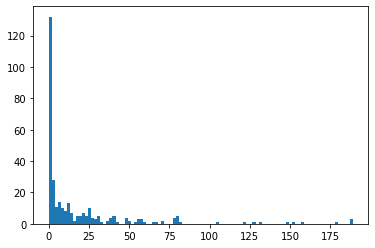

In [28]:
plt.hist(house_data['age'], bins = 100) # robust scaler for dealing with outliers

In [29]:
house_data['age'] = preprocessing.robust_scale(house_data['age'])

In [30]:
house_data.head()

,baths_1,baths_2,baths_3,baths_4,wind_3,wind_4,wind_5,wind_7,wind_11,rooms_4,...,1981,age,dist_bus,dist_interstate,area,land,dist_incinerator,near_incinerator,y81_and_nearinc,price
0,1,0,0,0,1,0,0,0,0,0,...,0,2.000000,3000,1000,1660,4578,10700,1,0,60000
1,0,1,0,0,1,0,0,0,0,0,...,0,3.590909,4000,1000,2612,8370,11000,1,0,40000
2,1,0,0,0,1,0,0,0,0,0,...,0,2.454545,4000,1000,1144,5000,11500,1,0,34000
3,1,0,0,0,1,0,0,0,0,0,...,0,0.318182,4000,1000,1136,10000,11900,1,0,63900
4,1,0,0,0,1,0,0,0,0,0,...,0,2.000000,4000,2000,1868,10000,12100,1,0,44000


###### dist_bus

(array([ 2.,  0.,  8.,  0.,  0., 20.,  0.,  0., 25.,  0.,  0.,  5.,  0.,
         0., 12.,  0.,  0.,  5.,  0.,  0.,  2.,  0.,  0.,  5.,  0.,  0.,
        16.,  0.,  0., 12.,  0.,  0., 22.,  0.,  0.,  6.,  0.,  0., 22.,
         0.,  0.,  3.,  0.,  0.,  9.,  0.,  0.,  6.,  0.,  0.,  5.,  0.,
         5.,  0.,  0., 11.,  0.,  0., 10.,  0.,  0., 13.,  0.,  0., 18.,
         0.,  0., 24.,  0.,  0.,  9.,  0.,  0.,  5.,  0.,  0.,  7.,  0.,
         0.,  4.,  0.,  0.,  3.,  0.,  0., 12.,  0.,  0.,  7.,  0.,  0.,
         2.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1000.,  1340.,  1680.,  2020.,  2360.,  2700.,  3040.,  3380.,
         3720.,  4060.,  4400.,  4740.,  5080.,  5420.,  5760.,  6100.,
         6440.,  6780.,  7120.,  7460.,  7800.,  8140.,  8480.,  8820.,
         9160.,  9500.,  9840., 10180., 10520., 10860., 11200., 11540.,
        11880., 12220., 12560., 12900., 13240., 13580., 13920., 14260.,
        14600., 14940., 15280., 15620., 15960., 16300., 16640., 16980.,
  

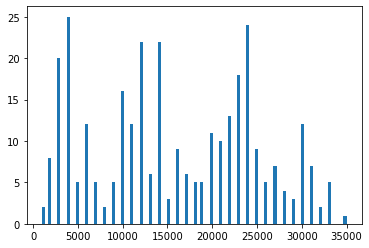

In [31]:
plt.hist(house_data['dist_bus'], bins=100) #min max scaler

In [32]:
house_data['dist_bus'] = preprocessing.minmax_scale(house_data['dist_bus'])

In [33]:
house_data.head()

,baths_1,baths_2,baths_3,baths_4,wind_3,wind_4,wind_5,wind_7,wind_11,rooms_4,...,1981,age,dist_bus,dist_interstate,area,land,dist_incinerator,near_incinerator,y81_and_nearinc,price
0,1,0,0,0,1,0,0,0,0,0,...,0,2.000000,0.058824,1000,1660,4578,10700,1,0,60000
1,0,1,0,0,1,0,0,0,0,0,...,0,3.590909,0.088235,1000,2612,8370,11000,1,0,40000
2,1,0,0,0,1,0,0,0,0,0,...,0,2.454545,0.088235,1000,1144,5000,11500,1,0,34000
3,1,0,0,0,1,0,0,0,0,0,...,0,0.318182,0.088235,1000,1136,10000,11900,1,0,63900
4,1,0,0,0,1,0,0,0,0,0,...,0,2.000000,0.088235,2000,1868,10000,12100,1,0,44000


###### dist_interstate

(array([ 5.,  0.,  0., 11.,  0.,  0.,  5.,  0.,  0., 12.,  0.,  0., 12.,
         0.,  0., 14.,  0.,  0., 16.,  0.,  0.,  5.,  0.,  0.,  4.,  0.,
         0., 15.,  0.,  0., 12.,  0.,  0., 12.,  0.,  0., 18.,  0.,  0.,
        10.,  0.,  0.,  6.,  0.,  0.,  7.,  0.,  0.,  8.,  0.,  0.,  7.,
         0.,  0.,  8.,  0.,  0.,  8.,  0.,  0., 10.,  0.,  0.,  4.,  0.,
         0., 18.,  0.,  0., 20.,  0.,  0., 11.,  0.,  0., 23.,  0.,  0.,
         2.,  0.,  0.,  9.,  0.,  0.,  3.,  0.,  0.,  6.,  0.,  0.,  9.,
         0.,  0.,  4.,  0.,  0.,  3.,  0.,  0.,  4.]),
 array([ 1000.,  1330.,  1660.,  1990.,  2320.,  2650.,  2980.,  3310.,
         3640.,  3970.,  4300.,  4630.,  4960.,  5290.,  5620.,  5950.,
         6280.,  6610.,  6940.,  7270.,  7600.,  7930.,  8260.,  8590.,
         8920.,  9250.,  9580.,  9910., 10240., 10570., 10900., 11230.,
        11560., 11890., 12220., 12550., 12880., 13210., 13540., 13870.,
        14200., 14530., 14860., 15190., 15520., 15850., 16180., 16510.,
  

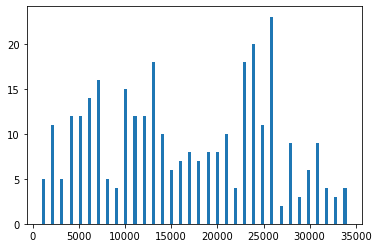

In [34]:
plt.hist(house_data['dist_interstate'], bins=100) #min max scaler

In [35]:
house_data['dist_interstate'] = preprocessing.minmax_scale(house_data['dist_interstate'])

In [36]:
house_data.head()

,baths_1,baths_2,baths_3,baths_4,wind_3,wind_4,wind_5,wind_7,wind_11,rooms_4,...,1981,age,dist_bus,dist_interstate,area,land,dist_incinerator,near_incinerator,y81_and_nearinc,price
0,1,0,0,0,1,0,0,0,0,0,...,0,2.000000,0.058824,0.000000,1660,4578,10700,1,0,60000
1,0,1,0,0,1,0,0,0,0,0,...,0,3.590909,0.088235,0.000000,2612,8370,11000,1,0,40000
2,1,0,0,0,1,0,0,0,0,0,...,0,2.454545,0.088235,0.000000,1144,5000,11500,1,0,34000
3,1,0,0,0,1,0,0,0,0,0,...,0,0.318182,0.088235,0.000000,1136,10000,11900,1,0,63900
4,1,0,0,0,1,0,0,0,0,0,...,0,2.000000,0.088235,0.030303,1868,10000,12100,1,0,44000


###### area

(array([ 2.,  0.,  0.,  0.,  5.,  3.,  2.,  3.,  2.,  9.,  4.,  7.,  6.,
         5.,  8.,  7.,  7.,  3., 11.,  4.,  2.,  6.,  5.,  4.,  6., 17.,
         3.,  7., 11., 11.,  7.,  7.,  2.,  5., 14.,  5.,  5.,  8.,  3.,
        19.,  5.,  9.,  4.,  8.,  4.,  9.,  5.,  4.,  4.,  2.,  1.,  1.,
         4.,  2.,  4.,  1.,  2.,  3.,  2.,  1.,  2.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.,  1.,  2.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 735.  ,  779.01,  823.02,  867.03,  911.04,  955.05,  999.06,
        1043.07, 1087.08, 1131.09, 1175.1 , 1219.11, 1263.12, 1307.13,
        1351.14, 1395.15, 1439.16, 1483.17, 1527.18, 1571.19, 1615.2 ,
        1659.21, 1703.22, 1747.23, 1791.24, 1835.25, 1879.26, 1923.27,
        1967.28, 2011.29, 2055.3 , 2099.31, 2143.32, 2187.33, 2231.34,
        2275.35, 2319.36, 2363.37, 2407.38, 2451.39, 2495.4 , 2539.41,
        

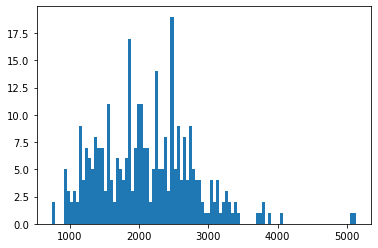

In [37]:
plt.hist(house_data['area'], bins = 100) #robust scaler for outlier

In [38]:
house_data['area'] = preprocessing.robust_scale(house_data['area'])

###### land

(array([18., 40., 25.,  9., 16., 18., 11., 90., 47., 17.,  3.,  8.,  4.,
         1.,  2.,  1.,  1.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1710. ,   7137.9,  12565.8,  17993.7,  23421.6,  28849.5,
         34277.4,  39705.3,  45133.2,  50561.1,  55989. ,  61416.9,
         66844.8,  72272.7,  77700.6,  83128.5,  88556.4,  93984.3,
         99412.2, 104840.1, 110268. , 115695.9, 121123.8, 126551.7,
        131979.6, 137407.5, 142835.4, 148263.3, 153691.2, 159119.1,
        164547. , 169974.9, 175402.8, 180830.7, 186258.6, 191686.5,
        197114.4, 202542.3

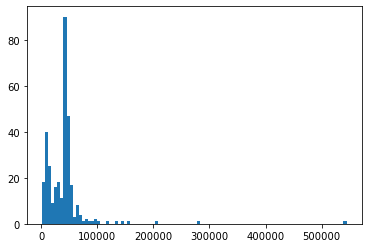

In [39]:
plt.hist(house_data['land'], bins = 100) #robust scaler for outliers

In [40]:
house_data['land'] = preprocessing.robust_scale(house_data['land'])

###### dist_incinerator

(array([ 3.,  0.,  5.,  2.,  2.,  4.,  2.,  2.,  3.,  1.,  4.,  1.,  1.,
         1., 11.,  3.,  3.,  5.,  5., 10.,  4.,  3.,  1.,  3.,  5.,  3.,
         0.,  1.,  3.,  0.,  5.,  6.,  3.,  4.,  8.,  2.,  7.,  1., 11.,
         9.,  7.,  3.,  4.,  4.,  3.,  7.,  3.,  4.,  3.,  1.,  0.,  3.,
         1.,  0.,  5.,  3.,  2.,  6.,  7.,  5.,  5.,  4., 11.,  4.,  0.,
         4., 16.,  3.,  5.,  1.,  3.,  3.,  0.,  0.,  4.,  1.,  2.,  2.,
         1.,  2., 12.,  0.,  0.,  0.,  2.,  2.,  3.,  4.,  0.,  1.,  4.,
         1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 5000.,  5350.,  5700.,  6050.,  6400.,  6750.,  7100.,  7450.,
         7800.,  8150.,  8500.,  8850.,  9200.,  9550.,  9900., 10250.,
        10600., 10950., 11300., 11650., 12000., 12350., 12700., 13050.,
        13400., 13750., 14100., 14450., 14800., 15150., 15500., 15850.,
        16200., 16550., 16900., 17250., 17600., 17950., 18300., 18650.,
        19000., 19350., 19700., 20050., 20400., 20750., 21100., 21450.,
  

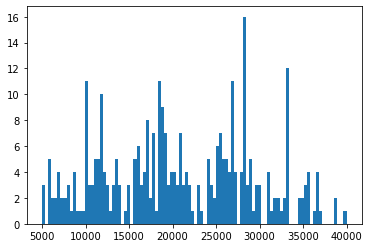

In [41]:
plt.hist(house_data['dist_incinerator'], bins = 100) #min max scaler

In [42]:
house_data['dist_incinerator'] = preprocessing.minmax_scale(house_data['dist_incinerator'])

In [43]:
house_data.head()

,baths_1,baths_2,baths_3,baths_4,wind_3,wind_4,wind_5,wind_7,wind_11,rooms_4,...,1981,age,dist_bus,dist_interstate,area,land,dist_incinerator,near_incinerator,y81_and_nearinc,price
0,1,0,0,0,1,0,0,0,0,0,...,0,2.000000,0.058824,0.000000,-0.402439,-1.336602,0.162857,1,0,60000
1,0,1,0,0,1,0,0,0,0,0,...,0,3.590909,0.088235,0.000000,0.565041,-1.206583,0.171429,1,0,40000
2,1,0,0,0,1,0,0,0,0,0,...,0,2.454545,0.088235,0.000000,-0.926829,-1.322133,0.185714,1,0,34000
3,1,0,0,0,1,0,0,0,0,0,...,0,0.318182,0.088235,0.000000,-0.934959,-1.150694,0.197143,1,0,63900
4,1,0,0,0,1,0,0,0,0,0,...,0,2.000000,0.088235,0.030303,-0.191057,-1.150694,0.202857,1,0,44000


### Model

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [45]:
y = house_data['price'].values

In [46]:
x = house_data.drop(['price'], axis=1)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#### Error Function

In [48]:
def error(y_pred, y_test):
    #'y_pred and y_test must be numpy arrays'
    differences = y_pred-y_test
    sum_of_squares_of_differences = sum(differences**2)
    error = sum_of_squares_of_differences**0.5
    return error

#### Random Forest

In [49]:
rfr = RandomForestRegressor(max_depth=3, n_estimators = 200)

In [50]:
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=200)

In [51]:
y_pred = rfr.predict(x_test)

In [52]:
random_forest_error = error(y_pred,y_test)
random_forest_error

163732.55635268884

In [53]:
depth_list = [4,8,16,25,30]
number_of_trees_list= [100,200,500,700,1000]
for depth in depth_list:
    for number_of_trees in number_of_trees_list:
        rfr = RandomForestRegressor(max_depth=depth, n_estimators=number_of_trees)
        rfr.fit(x_train, y_train)
        y_pred = rfr.predict(x_test)
        experiment_error = error(y_pred, y_test)
        print("Depth: ", depth, " Trees: ", number_of_trees, " and Error: ", experiment_error)

Depth:  4  Trees:  100  and Error:  153857.38045879552
Depth:  4  Trees:  200  and Error:  147897.91320959598
Depth:  4  Trees:  500  and Error:  151412.0712381134
Depth:  4  Trees:  700  and Error:  151203.47911176126
Depth:  4  Trees:  1000  and Error:  152002.74093501217
Depth:  8  Trees:  100  and Error:  148466.31456742913
Depth:  8  Trees:  200  and Error:  150792.38521931932
Depth:  8  Trees:  500  and Error:  148547.39344398183
Depth:  8  Trees:  700  and Error:  152061.97182632436
Depth:  8  Trees:  1000  and Error:  149080.68655019434
Depth:  16  Trees:  100  and Error:  149025.19136242842
Depth:  16  Trees:  200  and Error:  151059.7746060241
Depth:  16  Trees:  500  and Error:  145405.81949491418
Depth:  16  Trees:  700  and Error:  146807.06250255572
Depth:  16  Trees:  1000  and Error:  148300.575640126
Depth:  25  Trees:  100  and Error:  152793.92098149523
Depth:  25  Trees:  200  and Error:  150756.58827043304
Depth:  25  Trees:  500  and Error:  149189.14629884606
Dep

In [ ]:
#lowest error
Depth:  16  Trees:  500  and Error:  145405.81949491418

In [55]:
rfr = RandomForestRegressor(max_depth=16, n_estimators=500)
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

In [57]:
feature_importances = rfr.feature_importances_

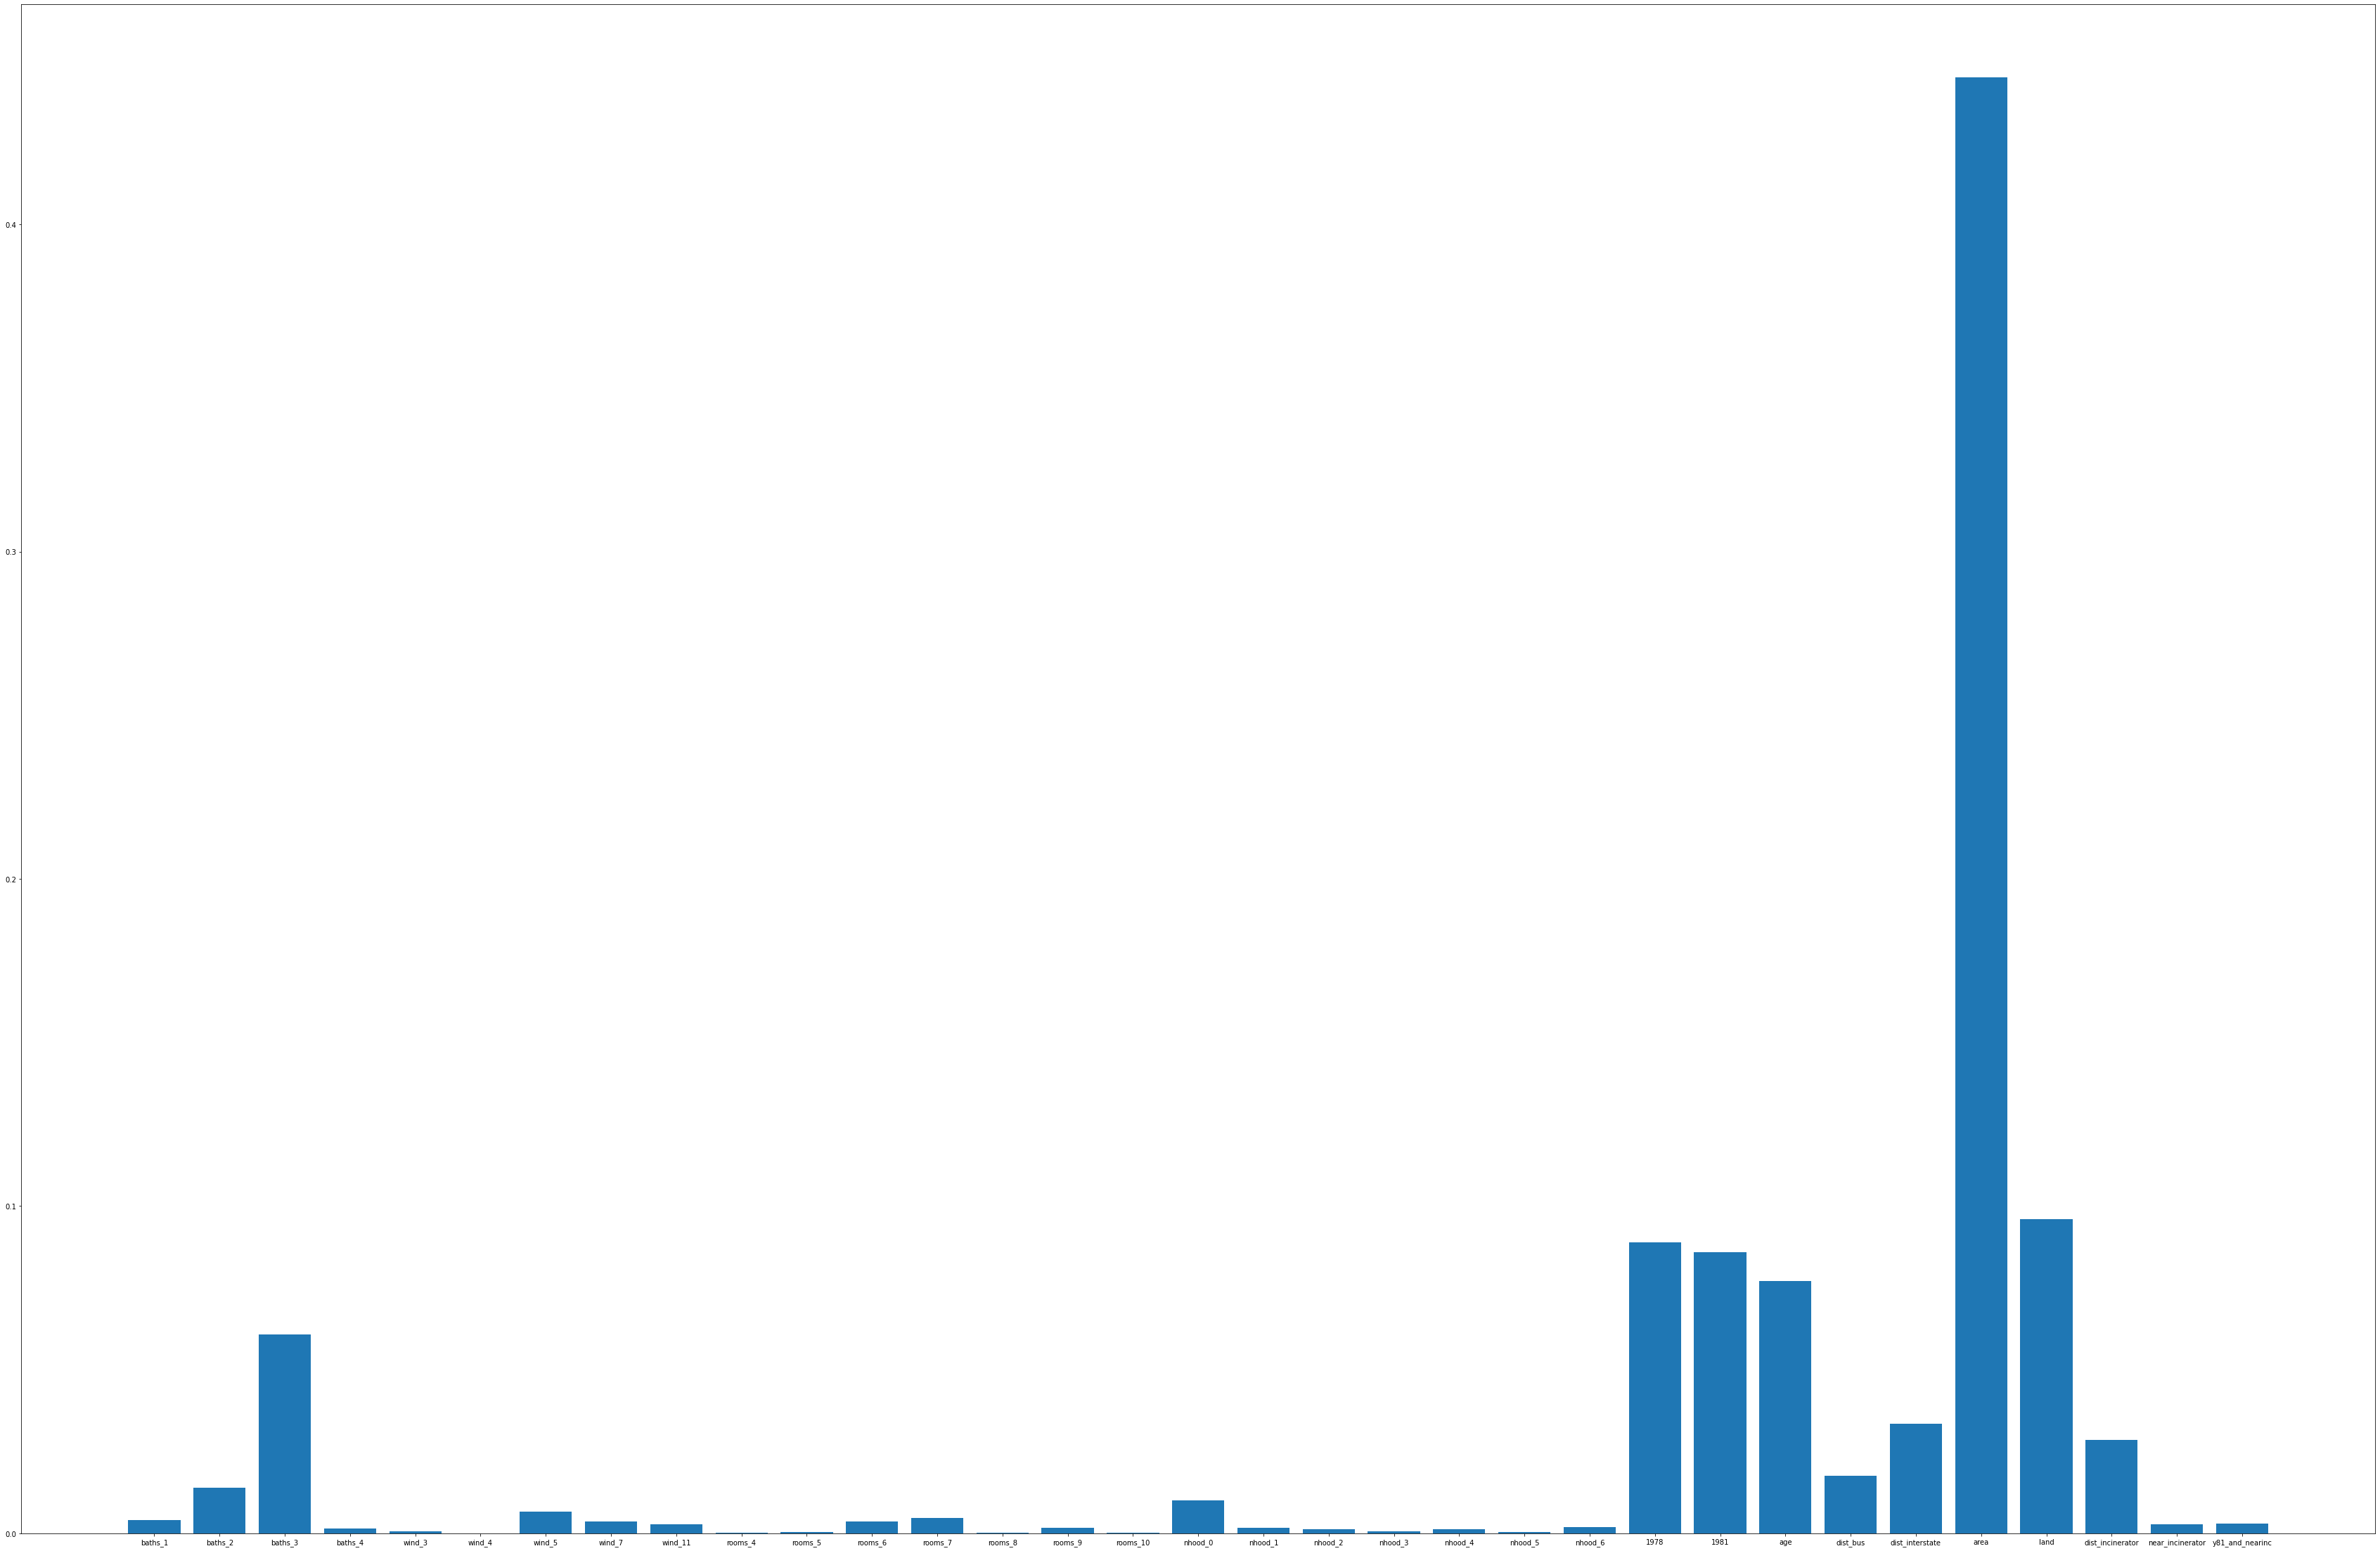

In [74]:
plt.figure(figsize=(60,40))
plt.bar([str(x) for x in list(x_train.columns)], feature_importances)
plt.savefig(r'C:\Users\Yogen\Documents\1. MBA\Outlook Internship\incinerator feature importance.jpg')

In [83]:
feature_importances_dict = dict(zip([str(x) for x in list(x_train.columns)],list(feature_importances)))

In [95]:
feature_importances_df = pd.DataFrame(zip([str(x) for x in list(x_train.columns)],list(feature_importances)))


In [97]:
feature_importances_df.to_csv(r'C:\Users\Yogen\Documents\1. MBA\Outlook Internship\incinerator feature importances.csv')

In [100]:
feature_importances_dict.keys()

dict_keys(['baths_1', 'baths_2', 'baths_3', 'baths_4', 'wind_3', 'wind_4', 'wind_5', 'wind_7', 'wind_11', 'rooms_4', 'rooms_5', 'rooms_6', 'rooms_7', 'rooms_8', 'rooms_9', 'rooms_10', 'nhood_0', 'nhood_1', 'nhood_2', 'nhood_3', 'nhood_4', 'nhood_5', 'nhood_6', '1978', '1981', 'age', 'dist_bus', 'dist_interstate', 'area', 'land', 'dist_incinerator', 'near_incinerator', 'y81_and_nearinc'])

Having 3 baths significantly affects the price of the house. '1978', '1981', 'age', 'dist_bus', 'dist_interstate', 'area', 'land', 'dist_incinerator' are all significant factors in affecting house price.
1. Houses from 1978 seem to have a bit higher value.
2. age does affect the price of the house significantly
3. having 3 baths is the most appropriate
4. area is the most significant feature for pricing the house
5. dist to the interstate is more important than distance to the bus station.